# 1.Regressão Linear
Modelagem da relação entre variáveis numéricas (variável dependente y
e variáveis explanatórias x)

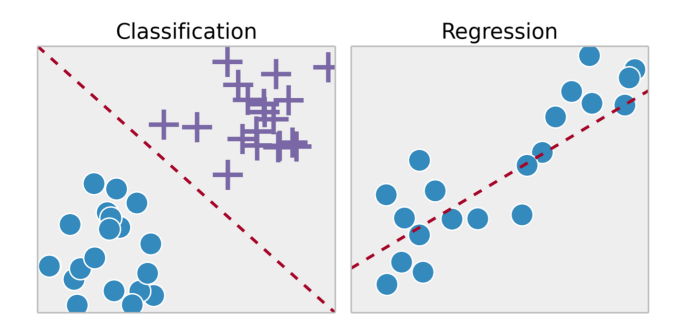

## Relações matemáticas entre variáveis

No exemplo abaixo vamos visualizar como o tamanho de um imóvel em m² influencia o valor de venda do mesmo imóvel.

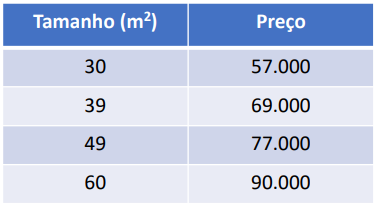

Existem três fatores matemáticos que podem determinar essa relação.

**Covariância**

Indica a relação linear entre duas variáveis

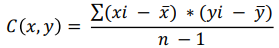

Onde o resultado:
- Maior que 0, variáveis se movem juntas
- Menor que zero 0, variáveis se movem em direções opostas
- Igual 0, variáveis são independentes

Vamos calcular com base no exemplo:

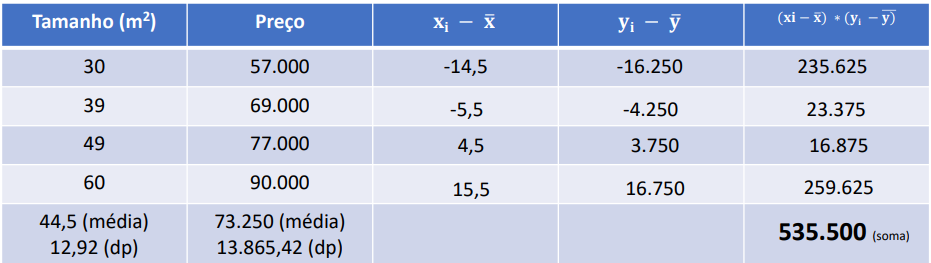

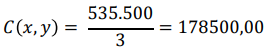

Assim percebemos que quanto maior o tamanho maior será o valor do imóvel.

**Coeficiente de Correlação**

Padroniza a covariância com valores entre -1 e 1. Quanto mais próximo dos extremos maior a relação entre as variáveis.

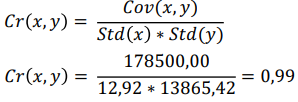

**Coeficiente de Determinação**

Mede a proporção da variância em uma variável que pode ser explicada pela outra, sendo o quadrado do coeficiente de correlação. 

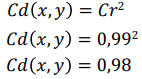

Dessa forma vemos que no exemplo 98% da variável dependente pode ser explicada pela outra.

## Regressão Linear Simples
Trata-se de um modelo de regrassão que trabalha com uma única variável explanatória.

Exemplo relação linear entre atributos: 


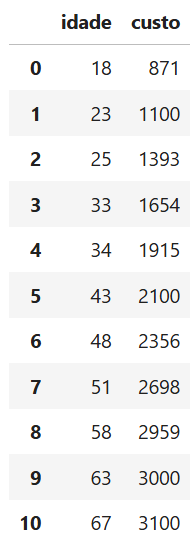

Podemos observar que quanto maior a idade do cliente, maior o custo do plano de saúde, conforme o gráfico de dispersão abaixo.

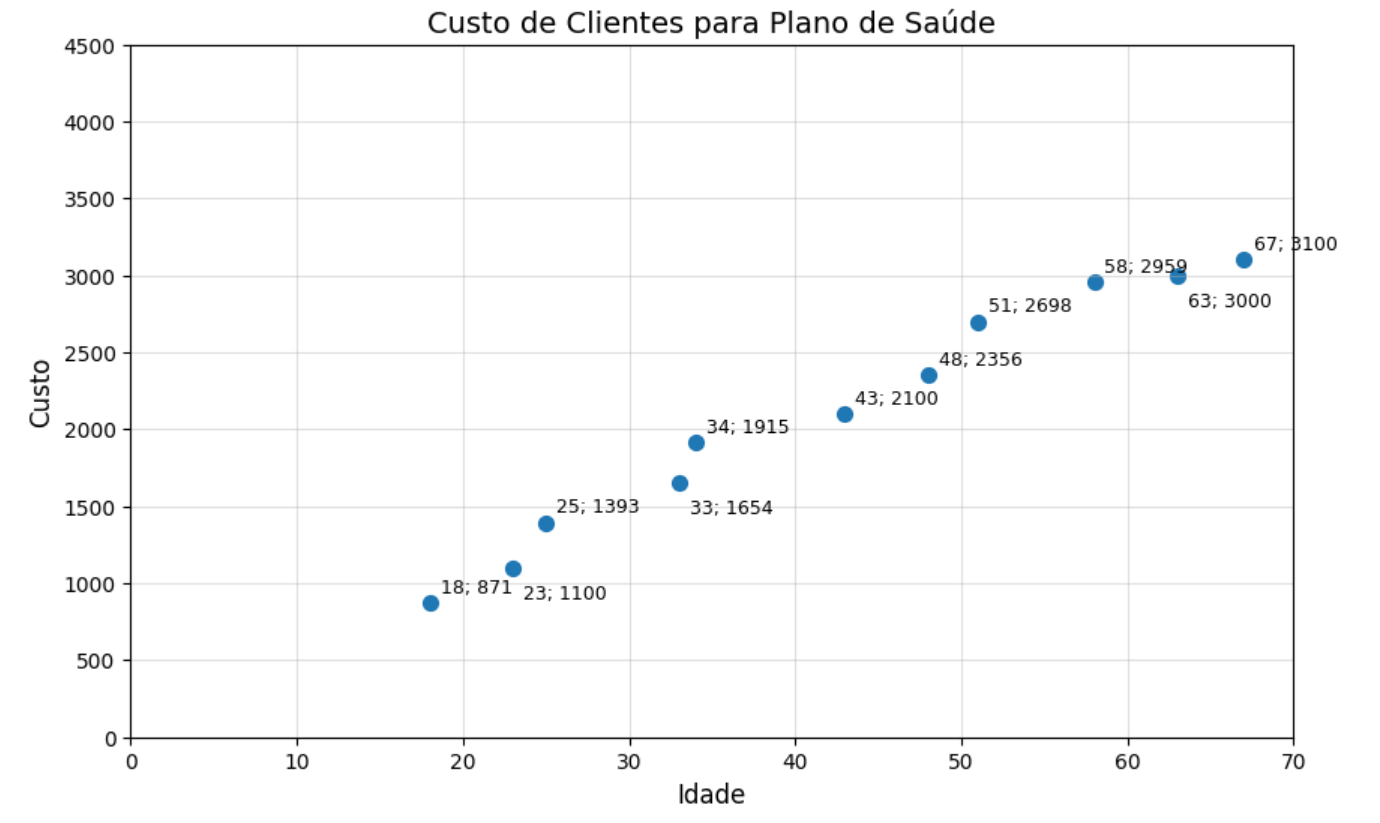

Assim podemos determinar que existe uma linearidade entre as duas variáveis. A partir disso, pode-se definir uma linha de regressão e fazer previsões de valores que não estão relacionados nos dados atuais.


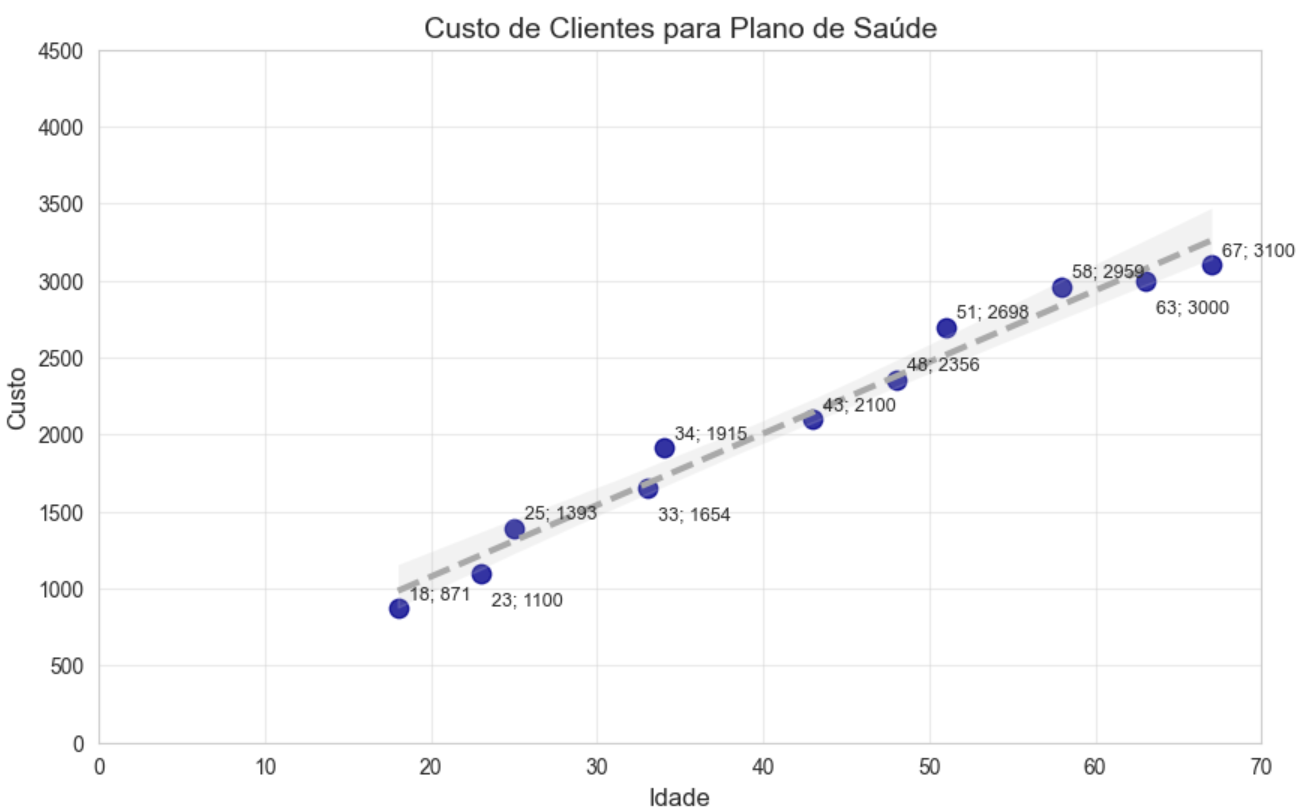

Essa linha é construida a partir de dois fatores.

**Intersecção** 

O ponto de encontro da linha no eixo Y, onde X = 0.

**Inclinação**

Fator que determina a inclinação da linha onde a cada unidade que aumenta a variável Independente (x), a variável de resposta (y) sobe o valor da inclinação.

Por fim podemos determinar a previsão de novos valores dado a fórmula:

## P = b + m * v

Onde:

**P** = previsão

**b (Constante)** = Intersecção

**m (Coeficiente)** = Inclinação

**v** = Valor a ser previsto em X

A função de um algoritmo de regressão é encontrar os valores de B0 e B1 que tragam os melhores resultados.

O fluxo matemático para chegarmos na previsão se dá da seguinte forma:

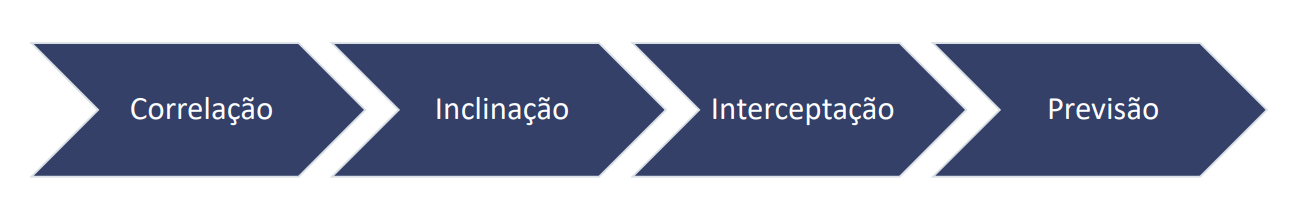

Vamos calcular novos valores para o exemplo anterior, conforme já vimos a correlação se da por **Cr = Cov(X,Y)/Std(X) x Std(Y)**. Assim:

## Cr = 11869,71 / 15,985 * 751,62

## Cr = 0,9879

A **Inclinação** se da pela fórmula:

## m = Cr(Std(Y)/Std(X))

Assim temos:

## m = 0,9879 (751,62/15,985)

## m = 46,45

Já a **Intersecção** :

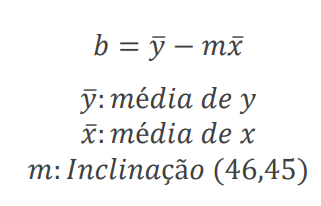

## b = 2104,182 − 46,45 ∗ 42,09

## b = 149,0577

Com esses valores conseguimos fazer novas previsões. Por exemplo para v = 54 anos:

## P = = 149,0577 + 46,45 ∗ 54

## P = 2657,35

Vamos testar isso na prática!

Sempre iniciamos importando as bibliotecas 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

A base plano de saúde possui os dados que vimos anteriormente.

In [4]:
base_plano = pd.read_csv('plano_saude.csv')
base_plano

,idade,custo
0,18,871
1,23,1100
2,25,1393
3,33,1654
4,34,1915
5,43,2100
6,48,2356
7,51,2698
8,58,2959
9,63,3000


Vamos criar uma regressão manualmente apenas aplicando todos os cálculos

In [5]:
def PrevisaoRegressaoLinear(x,y,v):
    x = np.array(x)
    y = np.array(y)
    
    cov_xy = np.corrcoef(x, y)[0,1]
    inclinacao = cov_xy*(np.std(y)/np.std(x))
    interseccao = np.mean(y) - inclinacao * np.mean(x)
    previsao = interseccao + inclinacao * v
    return float(previsao)

In [6]:
x = base_plano['idade']
y = base_plano['custo']

lr = PrevisaoRegressaoLinear(x,y,54)
lr

2657.3594760672704

## Utilizando sklearn

O exemplo anterior mostra como podemos fazer previsões apenas utilizando cálculos no entanto em python existem bibliotecas com algoritmos prontos que podem fazer o mesmo.

Para calcularmos o coeficiente de correlação utilizamos a função **corrcoef** da biblioteca numpy.

In [7]:
np.corrcoef(x, y)

array([[1.        , 0.98790395],
       [0.98790395, 1.        ]])

Conseguimos essa mesma correlação entre uma ou mais features de um dataframe utilizando a função corr da biblioteca pandas, para melhor visualização utilizamos um mapa de calor da biblioteca seaborn

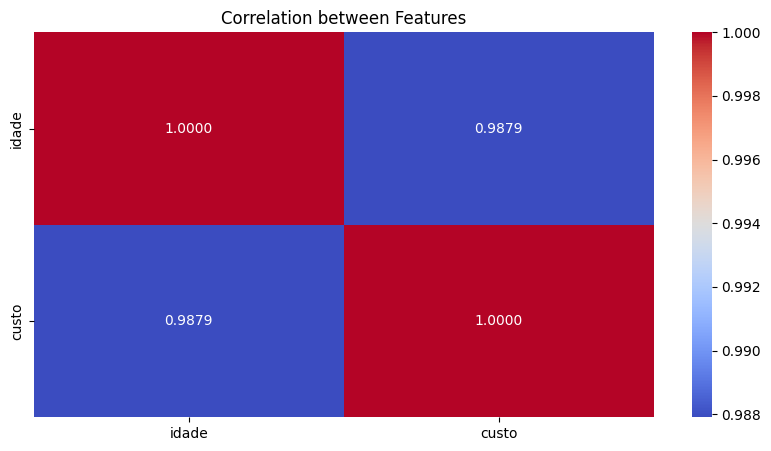

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(base_plano.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation between Features')
plt.show()

Para aplicarmos o algoritmo de regressão precisamos tranformar o X em um array bidimensional, mesmo que tenha apenas uma característica. Então vamos ajustar o formato da variável.

In [9]:
x = x.values.reshape(-1,1)
x.shape

(11, 1)

Agora com a biblioteca sklearn vamos importar a classe LinearRegression e instanciar numa variável um objeto dessa classe na sequência utilizamos a função **fit** para treinarmos o algoritmo com os dados reais, nesse treinamento ele irá encontrar os melhores valores para a intersecção e inclinação da linha de regressão.

In [10]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Com a função abaixo podemos visualizar o valor de intersecção encontrado.

In [11]:
regressor_plano_saude.intercept_

np.float64(149.05772962483752)

E na sequência encontramos a inclinação da linha.

In [12]:
regressor_plano_saude.coef_

array([46.45003234])

Agora fazermos as previsões de Y com base nos valores de X

In [13]:
previsoes = regressor_plano_saude.predict(x)
previsoes

array([ 985.15831177, 1217.40847348, 1310.30853816, 1681.9087969 ,
       1728.35882924, 2146.40912031, 2378.65928202, 2518.00937904,
       2843.15960543, 3075.40976714, 3261.20989651])

Para compararmos os valores reais com os previstos retornamos podemos utilizar um gráfico de dispersão da biblioteta plotly.

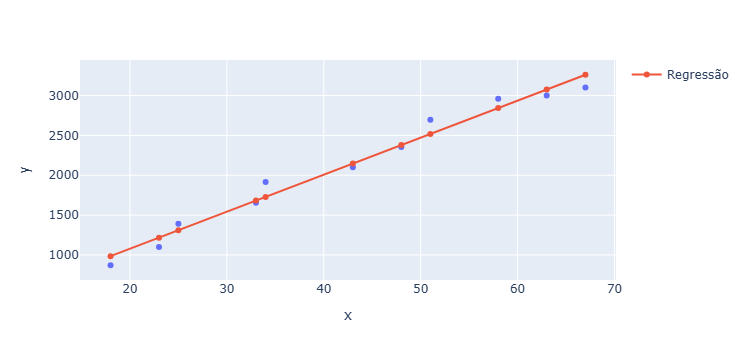

In [14]:
grafico = px.scatter(x = x.ravel(), y = y)
grafico.add_scatter(x = x.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

Por fim com o método **predict** para prevermos novos valores.

In [15]:
previsao_54_anos = regressor_plano_saude.predict([[54]])

print(f"A previsão para 54 anos é: {previsao_54_anos[0]:.2f}")

A previsão para 54 anos é: 2657.36


Para verificarmos quão bom foi o algoritmo nessa aplicação utilizamos a função **score**.

In [17]:
regressor_plano_saude.score(x.reshape(-1,1), y)

0.9759542217686598

## Regressão Linear Múltipla

Na regressão múltipla o algoritmo funciona da mesma forma porém considerando mais de uma variável exploratória para determinar valores da variável dependente. Nessa regessão o cálculo é diferente unicamente por considerar um coeficiente para cada característica do dataset conforme a fórmula abaixo.

## P = b + m1 * v1 + m2 * v2 + ... + mn * vn

Vamos testar com um novo dataset referente aos valores de imóveis.

In [18]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Vamos estudar as características do dataset.

In [19]:
#a versão atual do Pandas não está considerando o formato do dado como data, vamos remover esta coluna
base_casas.drop('date', axis=1, inplace = True)
base_casas

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Para verificarmos se existem valores vazios no dataset utilizamos a função abaixo. Caso existam precisam ser tratados.

In [21]:
base_casas.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Vamos criar o mapa de calor para analisar as correlações das features.

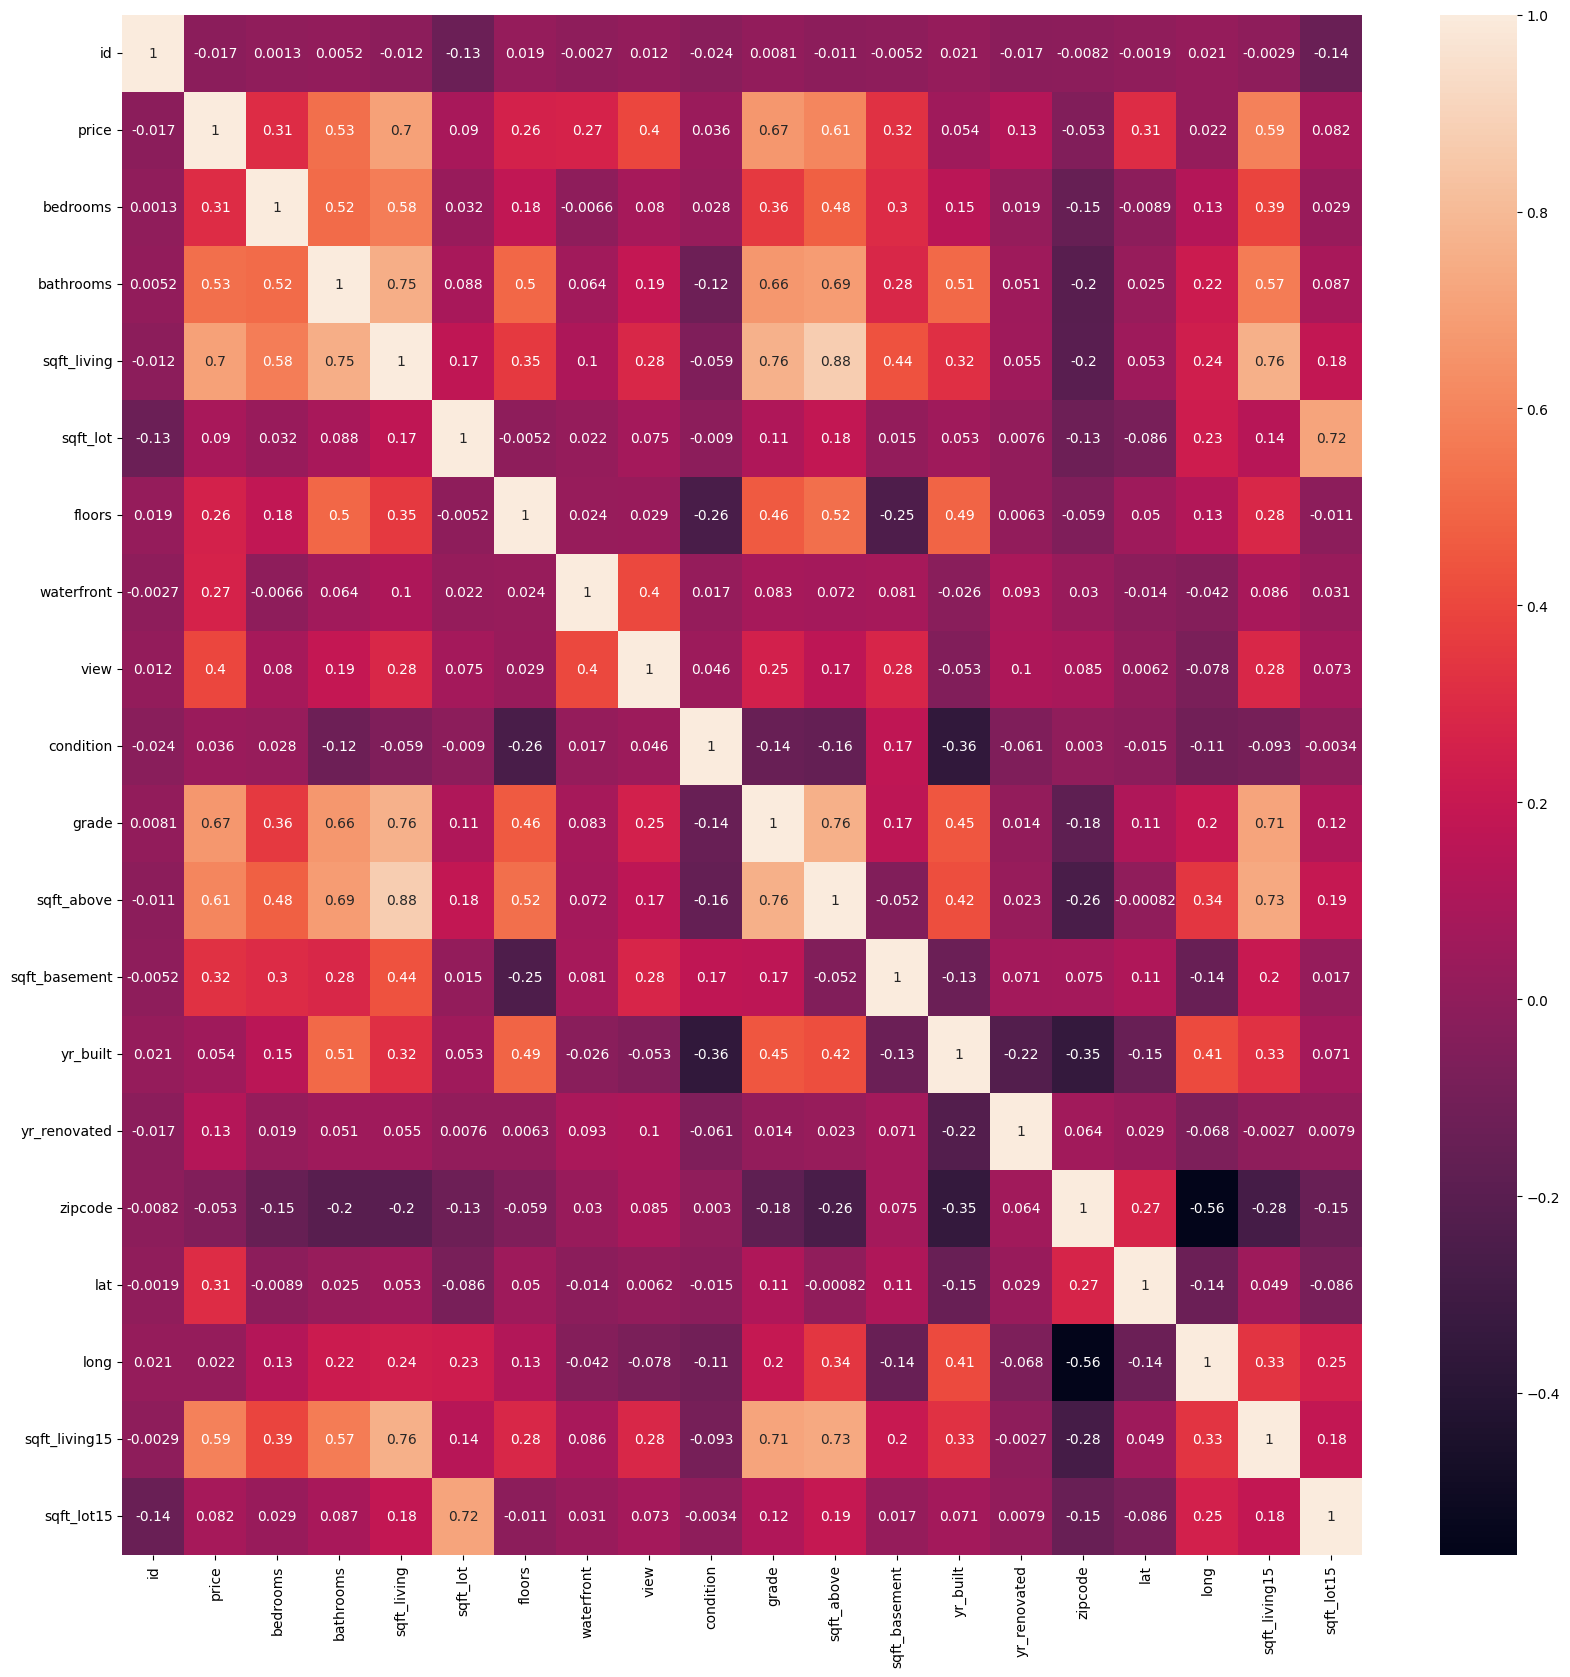

In [22]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(),  annot=True);

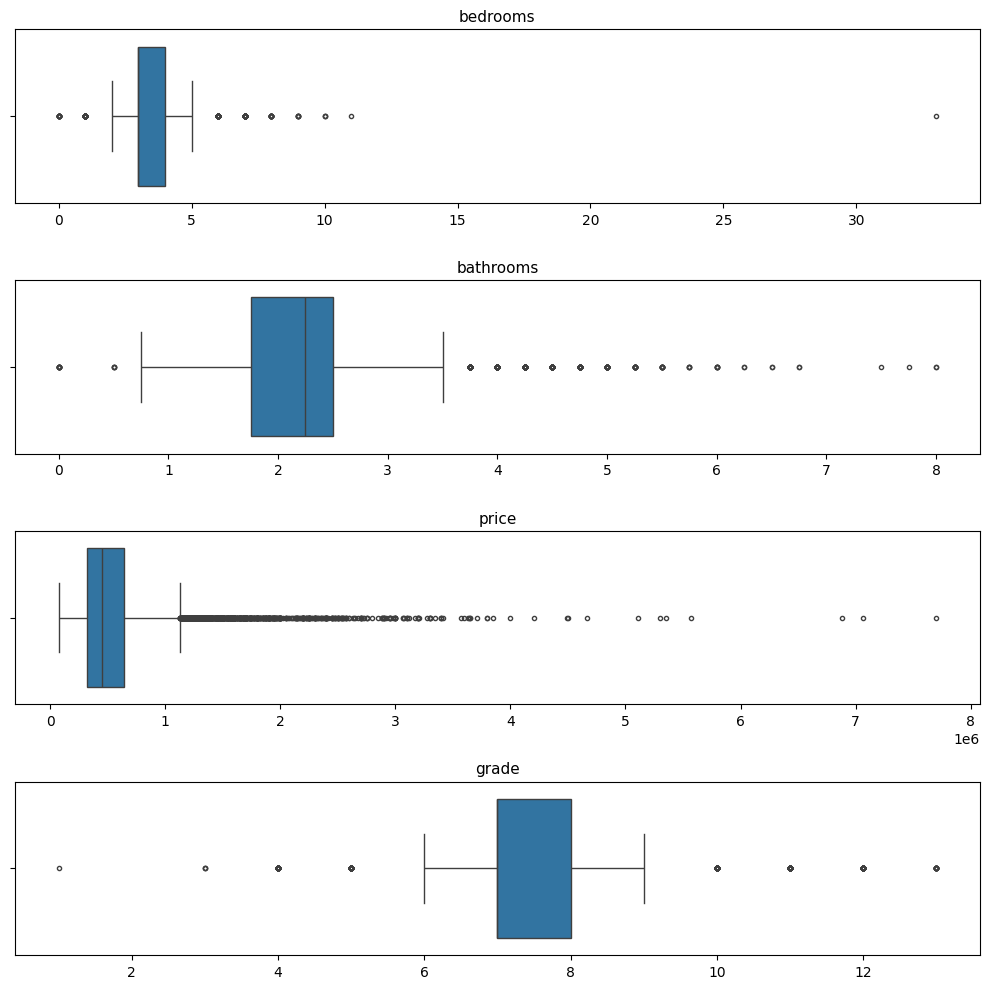

In [23]:
colunas = ['bedrooms', 'bathrooms', 'price', 'grade']

plt.figure(figsize=(10, 10)) 

for i, coluna in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)  # cada boxplot ocupa uma linha
    sns.boxplot(data=base_casas, x=coluna, fliersize=3, linewidth=1)
    plt.title(coluna, fontsize=11)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0)

plt.tight_layout()

Como o foco nesse caso é prever o preço, observamos as features que tem mais relação com a coluna "price". Podemos concluir que as variáveis que mais influenciam o valor do imóvel são: "sqft_living" (tamanho do imóvel), "sqft_lot" (tamanho do terreno), "grade" (nota do imóvel), "bathrooms" (número de banheiros). Vamos selecionar as colunas em x que utilizaremos para prever.

In [24]:
X_casas = base_casas.iloc[:, 2:18].values

E em y vamos selecionar a coluna "price" que queremos prever.

In [25]:
y_casas = base_casas.iloc[:, 1].values

Vamos importar a função para separarmos os dados de treinamento e teste, separando 30% dos dados para treinamento. O parâmetro random_state é como se fosse uma semente que você planta antes de usar a sorte (aleatoriedade) no seu código. Ele serve para congelar a aleatoriedade toda vez que você rodar o código, a divisão dos dados ou o resultado do seu modelo será diferente.

In [76]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.2, random_state = 42)

In [77]:
X_casas_treinamento.shape, X_casas_teste.shape

((17290, 16), (4323, 16))

Agora vamos treinar o algoritmo.

In [78]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Podemos medir a qualidade do treinamento dos dados com o algoritmo.

In [79]:
regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.6983188500566084

E também a qualidade dos dados de teste.

In [80]:
regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.6999397683935713

Podemos fazer as previsões com os dados que separamos para teste e comparar com os valores reais.

In [81]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([ 452543.74330989,  747488.69498968, 1233807.42966791, ...,
        415902.13479391,  622706.21412473,  435461.0654793 ])

In [82]:
y_casas_teste

array([ 365000.,  865000., 1038000., ...,  285000.,  605000.,  356500.])

## Métricas de erro

## Mean absolute error (MAE)
Diferenças absolutas entre as previsões e os valores reais

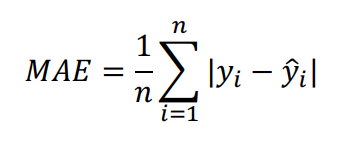

## Mean squared error (MSE)
Diferenças elevadas ao quadrado (erros penalizados) 

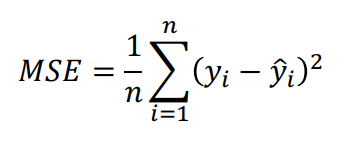

## Root mean squared error (RMSE)
Interpretação facilitada, pois no MSE os erros podem ter valores muito altos assim tiramos a raiz para facilitar.

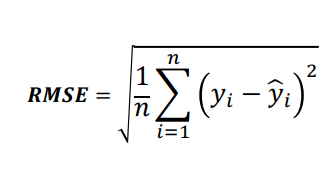

Vamos aplicar todos e ver as diferenças.

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_casas_teste, previsoes)
print(f"MAE: {mae}")

MAE: 127744.42981458819


Em média, a previsão do modelo de preço está errada por 123.888,44 para mais ou menos

In [84]:
mse = mean_squared_error(y_casas_teste, previsoes)
print(f"MSE: {mse}")

MSE: 45362119293.29081


Este é o erro quadrático médio, o número é muito grande porque os erros foram elevados ao quadrado, o número não está na unidade de preço e é muito grande. Sua principal função é penalizar erros maiores drasticamente. Se o modelo comete um erro de 500.000, o MSE o transforma em 250 bilhões. Isso torna o MSE sensível a outliers ou erros extremos.

In [85]:
rmse = np.sqrt(mean_squared_error(y_casas_teste, previsoes))
print(f"RMSE: {rmse}")

RMSE: 212983.84749386704


Este é a raiz quadrada do MSE, ele traz a métrica de volta para as unidades originais de preço. O RMSE é geralmente maior que o MAE (206.786,74 vs. 123.888,44). Essa diferença é crucial: O RMSE é maior que o MAE porque a raiz quadrada não consegue desfazer totalmente a penalização que o MSE aplicou aos erros grandes. 
Conclusão: O erro médio é de ≈124.000 (MAE), mas o erro que mais pesa no modelo é ≈207.000 (RMSE), indicando que as grandes falhas estão puxando o RMSE para cima. Na prática, o RMSE é frequentemente preferido porque equilibra a interpretabilidade (unidades originais) com a penalização de erros grandes.

O objetivo é sempre que esses erros sejam os menores possíveis.